In [ ]:
import tensorflow as tf
import PIL
import numpy as np

from PIL import Image
from tensorflow.keras import datasets, layers, models

import matplotlib
import matplotlib.pyplot as plt

In [ ]:
!python --version

Python 3.8.16


In [ ]:
number_of_data = 31  # 데이터 수
horizontal_size = 300  # 가로 사이즈
vertical_size = 400 #세로 사이즈
color = 3  # 컬러는 3, 흑백은 1
batch_size = 32  # 배치사이즈


# 곱셈의 형태로 만들기

x = np.zeros(number_of_data*vertical_size*horizontal_size*color, dtype=np.int32).reshape(number_of_data, vertical_size, horizontal_size, color)
y = np.zeros(number_of_data, dtype=np.int32)

# 덧셈의 형태로 만들기

x = np.zeros((number_of_data,) + (vertical_size, horizontal_size) + (color,), dtype="float32")
y = np.zeros((number_of_data,) + (1,), dtype="uint8")

In [ ]:
import glob
#아직은 임시로 샘플 데이터로 연습, 추후에 서버 컴퓨터로 전체 데이터 연습.
files = glob.glob('/content/drive/MyDrive/학부연구생/패션/input_dataset/sample_images/*.jpg')
styles = 'ivy feminine classic mods minimal popart space hippie disco military punk bold powersuit bodyconscious hiphop kitsch lingerie grunge metrosexual cityglam oriental ecology sportivecasual athleisure lounge normcore genderless'
styles = styles.split(' ')
temp_labels={}

for i in range(len(styles)):
  temp_labels[styles[i]] = i

i = 0
for file in files:
  img = Image.open(file)
  img_resize = img.resize((int(img.width / 10), int(img.height / 10))) # 4000 * 3000을 400 * 300으로
  img = np.array(img_resize, dtype=np.int32)  # PIL로 불러들인 이미지를 numpy array에 입력
  x[i, :, :, :] = img  # i번째에 이미지 픽셀값 입력
  label_num = temp_labels[files[i].split('/')[-1].split('_')[-2]] #style 종류(label)
  y[i] = label_num  # 해당 style로 라벨링
  i += 1

x = x/255.0  # 이미지 정규화

In [ ]:
labels={}
for key, value in temp_labels.items():
  labels[value]=key

In [ ]:
# split X and y into traning and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

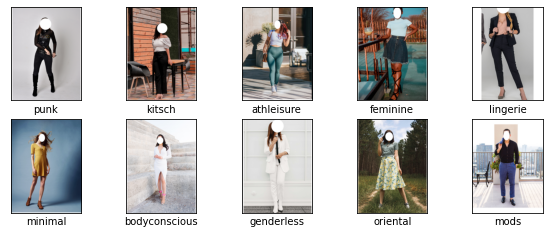

In [ ]:
#img 확인
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(labels[y_train[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(400, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 398, 298, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 199, 149, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 197, 147, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 98, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 71, 64)        36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(28)) #28개의 label

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 398, 298, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 199, 149, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 197, 147, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 98, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 71, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 436224)           

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1/1 [==============================] - 9s 9s/step - loss: 3.3416 - accuracy: 0.0000e+00 - val_loss: 20.3479 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 6s 6s/step - loss: 11.6574 - accuracy: 0.0417 - val_loss: 10.1015 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 6s 6s/step - loss: 7.4905 - accuracy: 0.0833 - val_loss: 5.5674 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 7s 7s/step - loss: 4.8135 - accuracy: 0.1250 - val_loss: 3.8931 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 6s 6s/step - loss: 2.7676 - accuracy: 0.3750 - val_loss: 4.6291 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 6s 6s/step - loss: 2.3633 - accuracy: 0.5000 - val_loss: 5.0556 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 7s 7s/step - loss: 1.7199 - accuracy: 0.6250 - val_loss: 4.4657 - val_accuracy: 0.0000e+00
Epoch 

1/1 - 0s - loss: 6.0480 - accuracy: 0.0000e+00 - 443ms/epoch - 443ms/step


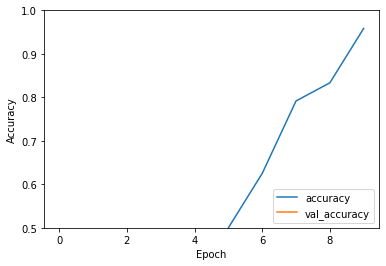

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [ ]:
print(test_acc)

0.0
